# What mental health issues are associated with the different job arrangements?
### Methodology
1. Group the work arrangement to explore the Isolation and the work-life balance rates.
2. Plot the relation between mental health status and job arrangements.

In [1]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, to_hex, ListedColormap

# Load the dataset
df = pd.read_csv('data\post_pandemic_remote_work_health_impact_2025.csv')

# Clean the data
df_survey = df.copy()
df_survey['Survey_Date'] = pd.to_datetime(df_survey['Survey_Date'], format='%Y-%m-%d')
df_survey['Physical_Health_Issues'] = df_survey['Physical_Health_Issues'].apply(lambda x: [item.strip() for item in x.split(';')] if pd.notnull(x) else x)
df_survey['Mental_Health_Status'] = df_survey['Mental_Health_Status'].fillna('Non-Diagnosis')

# Definition of the color palette
custom_colors = ['#A6AEAE', '#FB4F2A', '#A90113', '#75000C', '#3C0B09']
custom_cmap = ListedColormap(custom_colors)
smooth_cmap = LinearSegmentedColormap.from_list("custom_gradient", custom_colors, N=256)

In [2]:
# Group by Work Arrangement counts
df_work_arragement = df_survey.groupby('Work_Arrangement').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df_work_arragement

,Work_Arrangement,Count
1,Onsite,1562
0,Hybrid,1007
2,Remote,588


In [3]:
# Group by mental health status and work arrangement
health_work = df_survey.groupby(['Work_Arrangement','Mental_Health_Status']).size().reset_index(name='Count').sort_values(by='Work_Arrangement', ascending=False)
health_work

,Work_Arrangement,Mental_Health_Status,Count
20,Remote,Stress Disorder,71
19,Remote,PTSD,78
18,Remote,Non-Diagnosis,163
17,Remote,Depression,67
16,Remote,Burnout,63
15,Remote,Anxiety,75
14,Remote,ADHD,71
11,Onsite,Non-Diagnosis,368
13,Onsite,Stress Disorder,190
12,Onsite,PTSD,216


In [4]:
# Merge the two DataFrames to get a combined view of mental health status and work arrangement
df_merged = health_work.merge(df_work_arragement, on='Work_Arrangement', how='left')
df_merged.rename(columns={'Count_x': 'Mental_Health_Count', 'Count_y': 'Work_Arrangement_Total'}, inplace=True)
df_merged

,Work_Arrangement,Mental_Health_Status,Mental_Health_Count,Work_Arrangement_Total
0,Remote,Stress Disorder,71,588
1,Remote,PTSD,78,588
2,Remote,Non-Diagnosis,163,588
3,Remote,Depression,67,588
4,Remote,Burnout,63,588
5,Remote,Anxiety,75,588
6,Remote,ADHD,71,588
7,Onsite,Non-Diagnosis,368,1562
8,Onsite,Stress Disorder,190,1562
9,Onsite,PTSD,216,1562


In [5]:
# Add a column for the percentage of mental health issues in each work arrangement
df_merged['Percentage'] = (df_merged['Mental_Health_Count'] / df_merged['Work_Arrangement_Total']) * 100
df_merged.sort_values(by=['Work_Arrangement','Percentage'], ascending=False, inplace=True)
df_merged

,Work_Arrangement,Mental_Health_Status,Mental_Health_Count,Work_Arrangement_Total,Percentage
2,Remote,Non-Diagnosis,163,588,27.721088
1,Remote,PTSD,78,588,13.265306
5,Remote,Anxiety,75,588,12.755102
0,Remote,Stress Disorder,71,588,12.074830
6,Remote,ADHD,71,588,12.074830
3,Remote,Depression,67,588,11.394558
4,Remote,Burnout,63,588,10.714286
7,Onsite,Non-Diagnosis,368,1562,23.559539
9,Onsite,PTSD,216,1562,13.828425
11,Onsite,Burnout,207,1562,13.252241


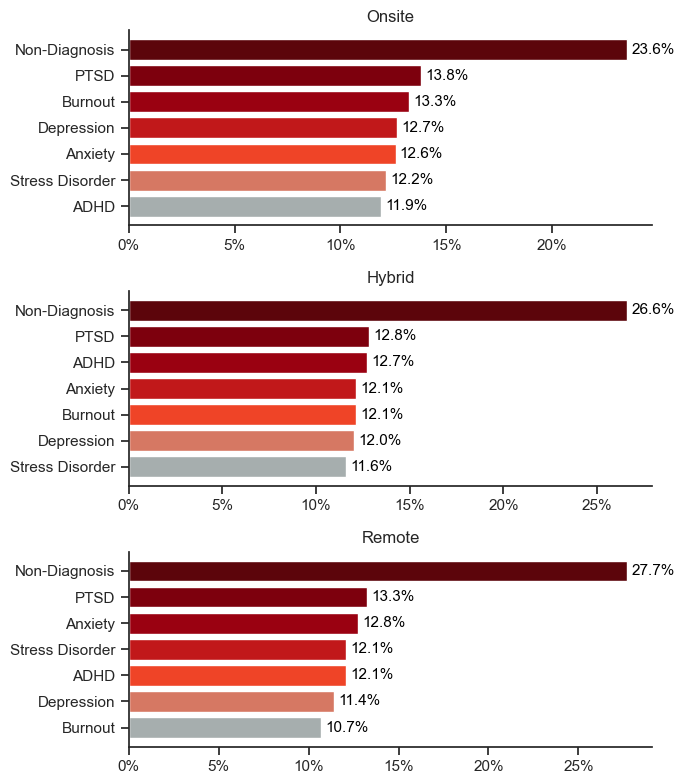

In [14]:
# Plot the percentage of mental health issues by work arrangement

fig, ax = plt.subplots(3, 1, figsize=(7, 8))
sns.set_theme(style="ticks")
# Create a List
work_arrangements = df['Work_Arrangement'].unique().tolist()

# Function to create a color palette for each work arrangement
def get_color_palette(cmap, n):
    return [to_hex(cmap(i / n)) for i in range(n)]


# Plot the data
for i, title in enumerate(work_arrangements):
    data = df_merged[df_merged['Work_Arrangement'] == title].sort_values(by='Percentage', ascending=False)
    graph = (ax[i].barh(data['Mental_Health_Status'],
               data['Percentage'],
               color=get_color_palette(smooth_cmap, len(data['Mental_Health_Status']))[::-1]))
    ax[i].set_title(title)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax[i].invert_yaxis()
   
    ax[i].bar_label(graph, labels=[f'{x:.1f}%' for x in data['Percentage']], padding=3, fontsize=11, color='black')
sns.despine()
plt.tight_layout()





# What is the impact of each work arrangement on work-life balance?

In [7]:
# Group by work arrangement and social isolation
social_isolation = df_survey.groupby(['Work_Arrangement','Social_Isolation_Score']).size().reset_index(name='Count').sort_values(by='Work_Arrangement', ascending=False)
social_isolation.replace({'Social_Isolation_Score': {1: 'Low Isolation',
                                                     2: 'Mild Isolation',
                                                     3: 'Moderate Isolation',
                                                     4: 'High Isolation',
                                                     5: 'Severe Isolation'}}, inplace=True)
social_isolation

,Work_Arrangement,Social_Isolation_Score,Count
10,Remote,Low Isolation,44
11,Remote,Mild Isolation,60
12,Remote,Moderate Isolation,165
13,Remote,High Isolation,198
14,Remote,Severe Isolation,121
5,Onsite,Low Isolation,367
6,Onsite,Mild Isolation,557
7,Onsite,Moderate Isolation,408
8,Onsite,High Isolation,137
9,Onsite,Severe Isolation,93


In [8]:
# Merge the social isolation and work-life balance DataFrames
social_life_pivot= social_isolation.pivot_table(index='Work_Arrangement', columns='Social_Isolation_Score', values='Count', aggfunc='sum')
# Change order of columns
desired_order = ['Low Isolation', 'Mild Isolation', 'Moderate Isolation', 'High Isolation', 'Severe Isolation']
social_life_pivot = social_life_pivot[desired_order]
social_life_pivot 

Social_Isolation_Score,Low Isolation,Mild Isolation,Moderate Isolation,High Isolation,Severe Isolation
Work_Arrangement,,,,,
Hybrid,160,239,356,201,51
Onsite,367,557,408,137,93
Remote,44,60,165,198,121


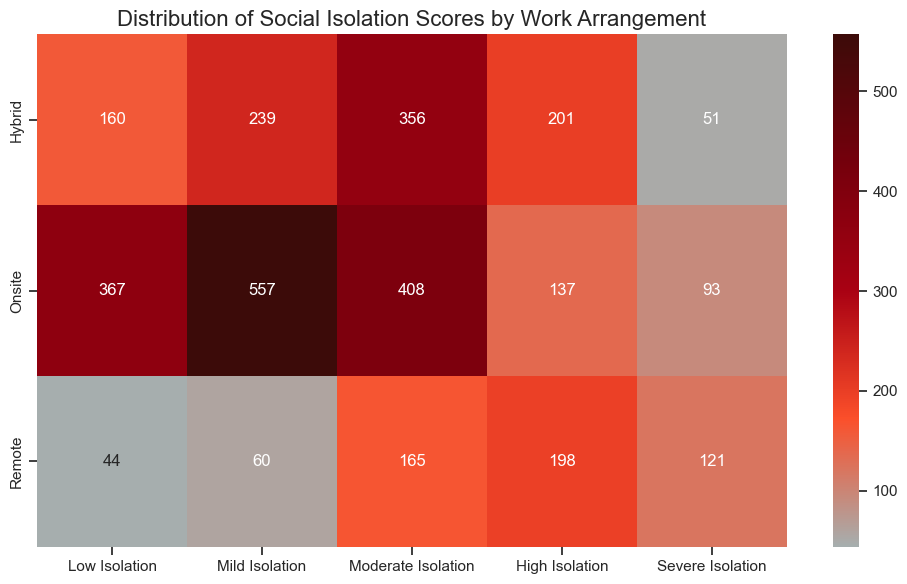

In [9]:
# Plot the heatmap for social isolation and work-life balance
sns.set_theme(style="ticks")

plt.figure(figsize=(10, 6))
sns.heatmap(social_life_pivot, annot=True, cmap=smooth_cmap, fmt='g')

plt.title('Distribution of Social Isolation Scores by Work Arrangement', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [10]:
# Group by Work Arrangement and Work-Life Balance
life_balance = df_survey.groupby(['Work_Arrangement', 'Work_Life_Balance_Score']).size().reset_index(name='Count').sort_values(by='Work_Arrangement', ascending=False)
life_balance.replace({'Work_Life_Balance_Score': {1: 'Poor',
                                                  2: 'Fair',
                                                  3: 'Moderate',
                                                  4: 'Good',
                                                  5: 'Excellent'}}, inplace=True)
life_balance

,Work_Arrangement,Work_Life_Balance_Score,Count
10,Remote,Poor,80
11,Remote,Fair,111
12,Remote,Moderate,209
13,Remote,Good,109
14,Remote,Excellent,79
5,Onsite,Poor,192
6,Onsite,Fair,261
7,Onsite,Moderate,602
8,Onsite,Good,324
9,Onsite,Excellent,183


In [11]:
# Pivot table for work-life balance
life_balance_pivot = life_balance.pivot_table(index='Work_Arrangement', columns='Work_Life_Balance_Score', values='Count', aggfunc='sum')
desired_order = ['Poor', 'Fair', 'Moderate', 'Good', 'Excellent']
life_balance_pivot = life_balance_pivot[desired_order]
life_balance_pivot

Work_Life_Balance_Score,Poor,Fair,Moderate,Good,Excellent
Work_Arrangement,,,,,
Hybrid,132,200,358,222,95
Onsite,192,261,602,324,183
Remote,80,111,209,109,79


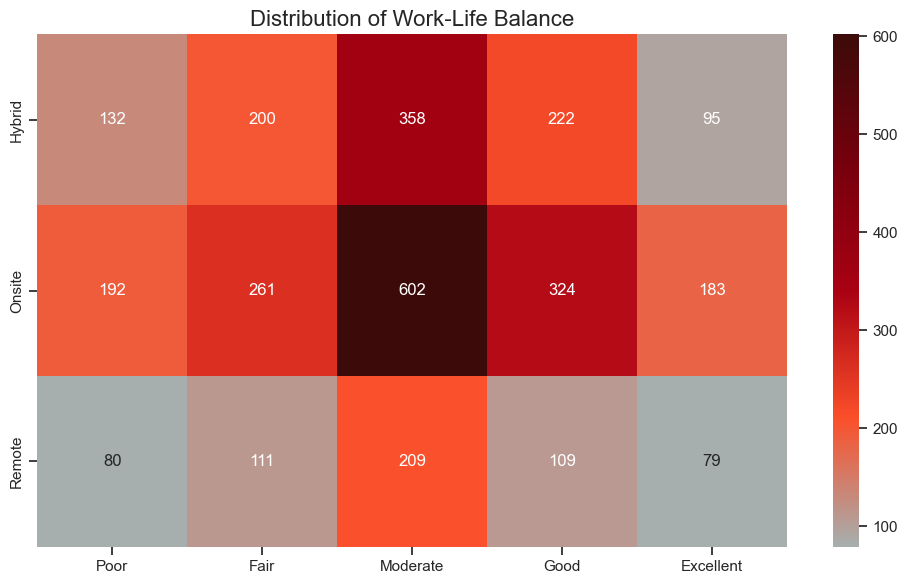

In [12]:
# Plot the heatmap for work-life balance
plt.figure(figsize=(10, 6))

sns.heatmap(life_balance_pivot, annot=True, cmap=smooth_cmap, fmt='g')

plt.title('Distribution of Work-Life Balance', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()